## Diamond Price Analysis using Python

A diamond is one of the most expensive stones. The price of diamonds varies irrespective of the size because of the factors affecting the price of a diamond. So, if you want to learn how to use your Data Science skills to analyze and predict the price of a diamond

## Diamond Price Analysis

To analyze the price of diamonds according to their attributes, we first need to have a dataset containing diamond prices based on their features. I found ideal data on Kaggle containing information about diamonds like:

* Carat
* Cut
* Colour
* Clarity
* Depth
* Table
* Price
* Size

## Diamond Price Analysis using Python

Let’s start the task of diamond price analysis by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
daimond = pd.read_csv("diamonds.csv")
daimond.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

This dataset contains an Unnamed column. I will delete this column before moving further:

In [3]:
daimond = daimond.drop("Unnamed: 0",axis = 1) # One Time Run only

Now let’s start analyzing diamond prices. I will first analyze the relationship between the carat and the price of the diamond to see how the number of carats affects the price of a diamond:

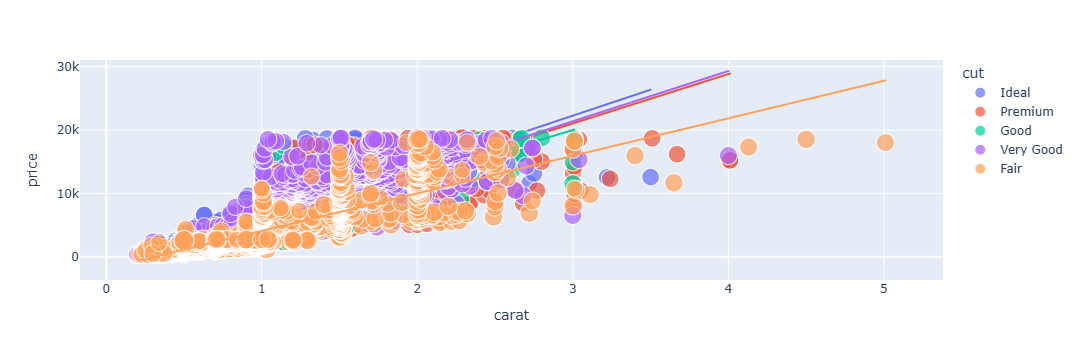

In [4]:
fig_caratVSprice = px.scatter(data_frame= daimond , x = "carat" , y = "price" , 
                              size = "depth" , color = "cut",trendline= "ols")
fig_caratVSprice.show()

We can see a linear relationship between the number of carats and the price of a diamond. It means higher carats result in higher prices.

Now I will add a new column to this dataset by calculating the size (length x width x depth) of the diamond:

In [5]:
daimond["size"] = daimond["x"] * daimond["y"]  * daimond["z"]
daimond.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

        size  
0  38.202030  
1  34.505856  
2  38.076885  
3  46.724580  
4  51.917250

Now let’s have a look at the relationship between the size of a diamond and its price:

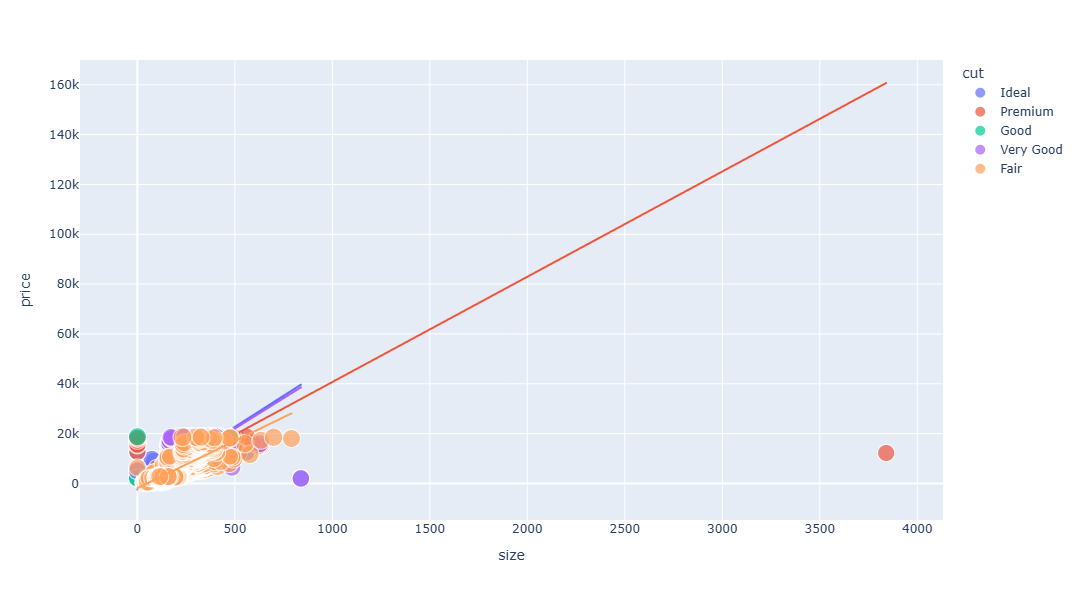

In [12]:
fig_sizeVSprice = px.scatter(data_frame= daimond , x = "size" , y = "price" , 
                              size = "depth" , color = "cut",trendline= "ols", width= 800  , height= 600)
fig_sizeVSprice.show()

The above figure concludes two features of diamonds:

* Premium cut diamonds are relatively large than other diamonds
* There’s a linear relationship between the size of all types of diamonds and their prices

Now let’s have a look at the prices of all the types of diamonds based on their colour:

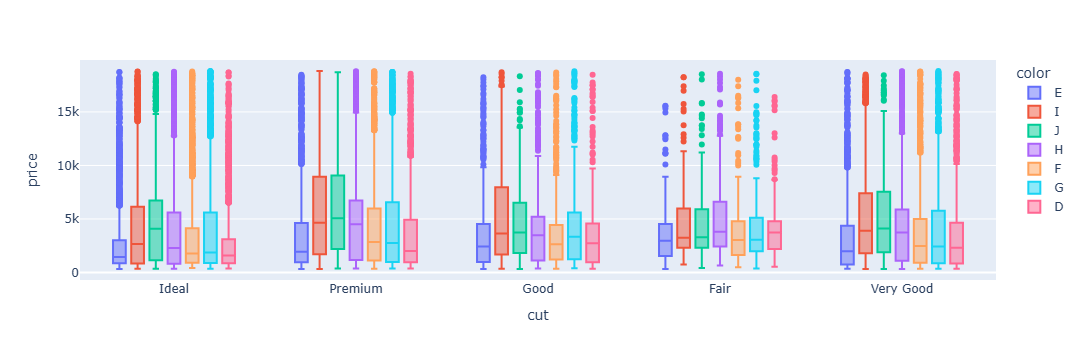

In [17]:
fig_colorVSPrice = px.box(daimond , x = "cut" , y = "price" , color= "color")

fig_colorVSPrice.show()

Now let’s have a look at the prices of all the types of diamonds based on their clarity:

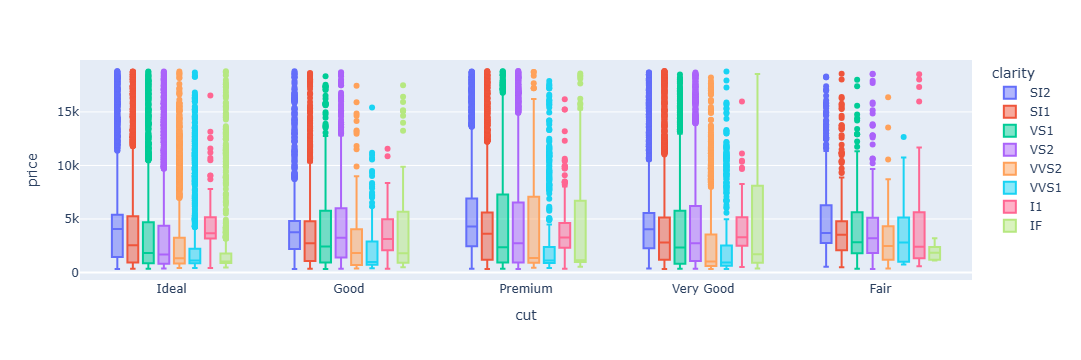

In [18]:
fig_typeVSprice = px.box(daimond , x = "cut" ,  y = "price" , color = "clarity")
fig_typeVSprice.show()

Now let’s have a look at the correlation between diamond prices and other features in the dataset:

In [21]:
correlation = daimond.corr(numeric_only=True)
correlation["price"].sort_values(ascending = False)

price    1.000000
carat    0.921591
size     0.902385
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

## Diamond Price Prediction

Now, I will move to the task of predicting diamond prices by using all the necessary information from the diamond price analysis done above.

Before moving forward, I will convert the values of the cut column as the cut type of diamonds is a valuable feature to predict the price of a diamond. To use this column, we need to convert its categorical values into numerical values. Below is how we can convert it into a numerical feature:

In [23]:
daimond["cut"] = daimond["cut"].map({"Ideal": 1 , "Premium" : 2 , "Good": 3 , "Very Good": 4 , "Fair": 5})
daimond["cut"]

0        1
1        2
2        3
3        2
4        3
        ..
53935    1
53936    3
53937    4
53938    2
53939    1
Name: cut, Length: 53940, dtype: int64

Now, let’s split the data into training and test sets:

In [24]:
#Splitting Data 
from sklearn.model_selection import train_test_split
X = np.array(daimond[["carat", "cut" , "size"]])
y = np.array(daimond[["price"]])


X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.10 , random_state= 42)

Now I will train a machine learning model for the task of diamond price prediction:

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

C:\Users\ahussain\Documents\Anaconda3\envs\py310_env\lib\site-packages\sklearn\base.py:1365: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor()

In [30]:
print("Daimond Price Prediction")
carat= float(input("Enter Carat Size : " ))
cut = int(input("Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5):" ))   
size = float(input("Size : "))

features = np.array([[carat,cut,size]])

print("Predicted Daimond's Price = ", model.predict(features))

Daimond Price Prediction


Enter Carat Size :  3.015
Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): 2
Size :  4.0125


Predicted Daimond's Price =  [17088.06592857]


## Summary

So this is how you can use your Data Science skills for the task of diamond price analysis and prediction using the Python programming language. According to the diamond price analysis, we can say that the price and size of premium diamonds are higher than other types of diamonds